In [1]:
import os
import zipfile
import shutil

In [1]:
#file_train = zipfile.ZipFile("./horse-or-human.zip",'r')
#file_test = zipfile.ZipFile("./validation-horse-or-human.zip")

In [3]:
#os.makedirs("./data")

In [4]:
#file_train.extractall("./data/train")
#file_test.extractall("./data/validation")

In [2]:
print("Data Size : \n===========================")
print("Horses Shape : ",len(os.listdir("./data/train/horses/")))
print("Humans Shape : ",len(os.listdir("./data/train/humans/")))

Data Size : 
Horses Shape :  400
Humans Shape :  400


In [3]:
train_horses = "./data/train/horses/"
test_horses  = "./data/test/horses/"
#os.makedirs(test_horses)
train_humans = "./data/train/humans/"
test_humans = "./data/test/humans/"
#os.makedirs(test_humans)

In [4]:
def train_test_split(num=80):
    for i in os.listdir(train_horses)[0:100]:
        shutil.move(train_horses+i,test_horses)
    for i in os.listdir(train_humans)[:100]:
        shutil.move(train_humans+i,test_humans)

In [8]:
#train_test_split()

In [5]:
print("Data Size :")
print("\nTrain Data :\n*******************************")
print("Horses Shape : ",len(os.listdir(train_horses)))
print("Humans Shape : ",len(os.listdir(train_humans)))
print("\nTest Data :\n*******************************")
print("Horses Shape : ",len(os.listdir(test_horses)))
print("Humans Shape : ",len(os.listdir(test_humans)))

Data Size :

Train Data :
*******************************
Horses Shape :  400
Humans Shape :  400

Test Data :
*******************************
Horses Shape :  100
Humans Shape :  100


In [12]:
def remove_file(File,Size):
    for i in os.listdir(File)[:Size]:
        os.remove(File+i)

In [13]:
#remove_file(train_humans,27)

In [6]:
print("Data Size :")
print("\nTrain Data :\n*******************************")
print("Horses Shape : ",len(os.listdir(train_horses)))
print("Humans Shape : ",len(os.listdir(train_humans)))
print("\nTest Data :\n*******************************")
print("Horses Shape : ",len(os.listdir(test_horses)))
print("Humans Shape : ",len(os.listdir(test_humans)))

Data Size :

Train Data :
*******************************
Horses Shape :  400
Humans Shape :  400

Test Data :
*******************************
Horses Shape :  100
Humans Shape :  100


In [7]:
import tensorflow as tf

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [55]:
train_datagen = ImageDataGenerator(rescale= (1.0 / 255))
test_datagen  = ImageDataGenerator(rescale= (1.0 / 255))

In [56]:
train_path = "./data/train/"
train_data = train_datagen.flow_from_directory(train_path,target_size=(150,150),class_mode="binary",batch_size=10)

test_path  = "./data/test/"
test_data  = test_datagen.flow_from_directory(test_path,target_size=(150,150),class_mode="binary",batch_size=10)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
import cv2

In [40]:
def imshow(filepath,index):
    img = cv2.imread(filepath+os.listdir(filepath)[index])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

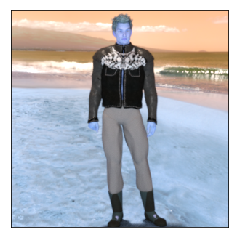

In [41]:
imshow(train_humans,200)

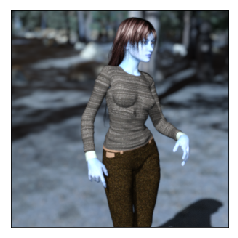

In [42]:
imshow(test_humans,50)

In [43]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(150,150,3)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model1.compile(loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

In [44]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               34560512  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 34,561,025
Trainable params: 34,561,025
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model1.fit_generator(train_data,epochs=5,validation_data=test_data)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 80 steps, validate for 20 steps
Epoch 1/5
80/80 [==============================] - 89s 1s/step - loss: 46.3697 - acc: 0.5000 - val_loss: 53.7063 - val_acc: 0.5000
Epoch 2/5
80/80 [==============================] - 72s 895ms/step - loss: 25.5847 - acc: 0.5400 - val_loss: 23.5313 - val_acc: 0.5000
Epoch 3/5
80/80 [==============================] - 71s 887ms/step - loss: 17.9368 - acc: 0.5675 - val_loss: 6.1536 - val_acc: 0.6300
Epoch 4/5
80/80 [==============================] - 71s 891ms/step - loss: 10.7949 - acc: 0.5850 - val_loss: 3.4439 - val_acc: 0.6500
Epoch 5/5
80/80 [==============================] - 72s 901ms/step - loss: 5.9206 - acc: 0.5962 - val_loss: 0.8439 - val_acc: 0.8150


In [20]:
def createGraph(history):
    plt.figure(figsize=(14,6))
    plt.plot(list(range(1,6)),history.history['acc'],label="Train Case",marker='o')
    plt.plot(list(range(1,6)),history.history['val_acc'],label="Test Case",marker="o")
    plt.title("Accurecy")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14,6))
    plt.title("Loss")
    plt.plot(list(range(1,6)),history.history['loss'],label="Train Case",marker='o')
    plt.plot(list(range(1,6)),history.history['val_loss'],label="Test Case",marker="o")
    plt.legend()

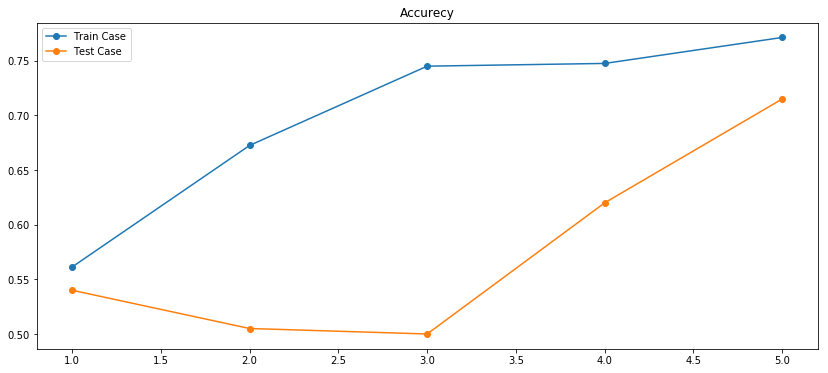

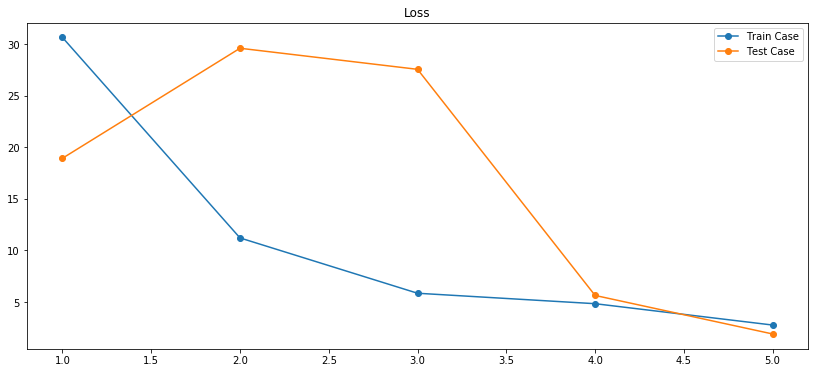

In [55]:
createGraph(history)

In [56]:
#cnn

In [52]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model2.compile(loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

In [53]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [57]:
history = model2.fit_generator(train_data,epochs=5,validation_data=test_data)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 80 steps, validate for 20 steps
Epoch 1/5
80/80 [==============================] - 43s 539ms/step - loss: 0.1110 - acc: 0.9750 - val_loss: 0.7982 - val_acc: 0.7450
Epoch 2/5
80/80 [==============================] - 43s 540ms/step - loss: 0.0189 - acc: 0.9962 - val_loss: 1.1310 - val_acc: 0.8400
Epoch 3/5
80/80 [==============================] - 43s 537ms/step - loss: 0.0323 - acc: 0.9937 - val_loss: 0.8486 - val_acc: 0.8350
Epoch 4/5
80/80 [==============================] - 44s 545ms/step - loss: 0.0472 - acc: 0.9887 - val_loss: 0.4052 - val_acc: 0.8200
Epoch 5/5
80/80 [==============================] - 43s 542ms/step - loss: 2.7159e-04 - acc: 1.0000 - val_loss: 3.9506 - val_acc: 0.7600


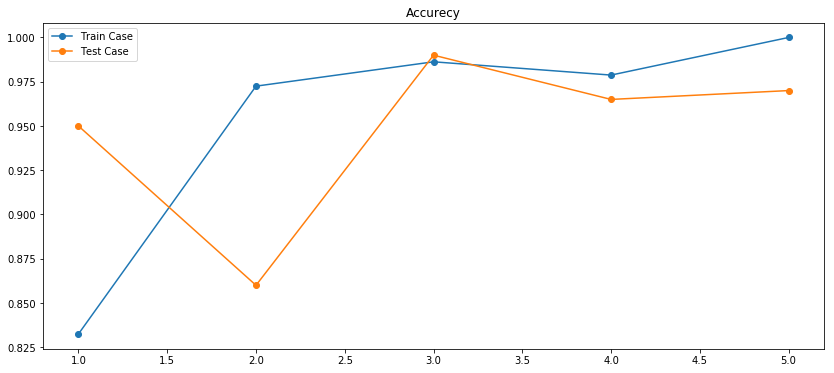

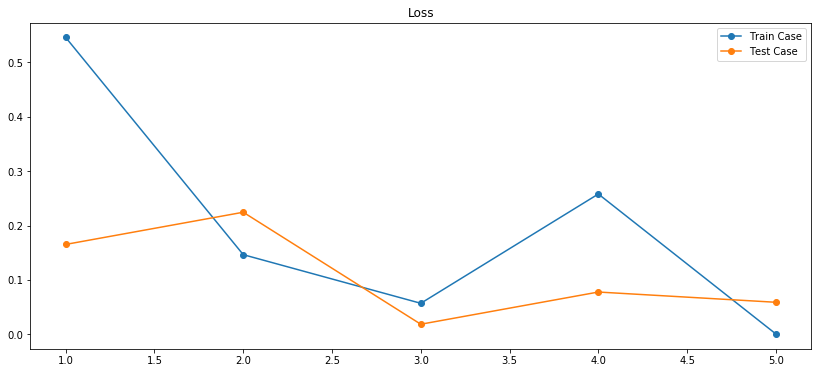

In [61]:
createGraph(history)

In [19]:
validation_horse = "./data/validation/horses/"
validation_human = "./data/validation/humans/"

In [74]:
import random

In [77]:
random.choice([1,5,6,8,10,7])

5

In [78]:
imgtest = cv2.imread(validation_horse+random.choice(os.listdir(validation_horse)))

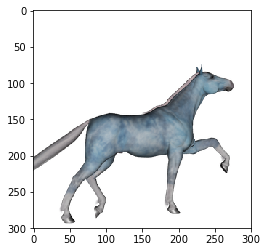

In [79]:
plt.imshow(imgtest)

In [80]:
validation_datagen = ImageDataGenerator(rescale=(1. / 255))

In [87]:
a = imgtest / 255

In [90]:
a = a.reshape((1,300,300,3))

In [93]:
a = cv2.resize(imgtest,(150,150))

In [95]:
a = a.reshape((1,150,150,3))

In [96]:
model2.predict(a)

array([[0.]], dtype=float32)

In [97]:
model2.predict_proba(a)

array([[0.]], dtype=float32)

In [36]:
def predict(file_path1,file_path2,model):
    animal = ["Horse","Human"]
    
    imgtest1 = cv2.imread(file_path1+random.choice(os.listdir(file_path1)))
    imgtest2 = cv2.imread(file_path2+random.choice(os.listdir(file_path2)))
    imgtest3 = cv2.imread(file_path1+random.choice(os.listdir(file_path1)))
    imgtest4 = cv2.imread(file_path2+random.choice(os.listdir(file_path2)))

    fig,ax = plt.subplots(1,4,figsize=(16, 7))
    
    
    a1 = cv2.resize(imgtest1,(150,150))
    a1 = a1.reshape((1,150,150,3))
    a1 = a1 / 255
    
    a2 = cv2.resize(imgtest2,(150,150))
    a2 = a2.reshape((1,150,150,3))
    a2 = a2 / 255
    
    a3 = cv2.resize(imgtest3,(150,150))
    a3 = a3.reshape((1,150,150,3))
    a3 = a3 / 255
    
    a4 = cv2.resize(imgtest4,(150,150))
    a4 = a4.reshape((1,150,150,3))
    a4 = a4 / 255
    
    
    #print(model2.predict_classes(a1)[0][0])
    ax[0].imshow(imgtest1)
    ax[0].set_title("This is a : %s"%animal[model.predict_classes(a1)[0][0]])
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    
    #print(model2.predict_classes(a1)[0][0])
    ax[1].imshow(imgtest2)
    ax[1].set_title("This is a : %s"%animal[model.predict_classes(a2)[0][0]])
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    
    #print(model2.predict_classes(a1)[0][0])
    ax[2].imshow(imgtest3)
    ax[2].set_title("This is a : %s"%animal[model.predict_classes(a3)[0][0]])
    ax[2].set_xticks([])
    ax[2].set_yticks([])
    
    #print(model2.predict_classes(a1)[0][0])
    ax[3].imshow(imgtest4)
    ax[3].set_title("This is a : %s"%animal[model.predict_classes(a4)[0][0]])
    ax[3].set_xticks([])
    ax[3].set_yticks([])

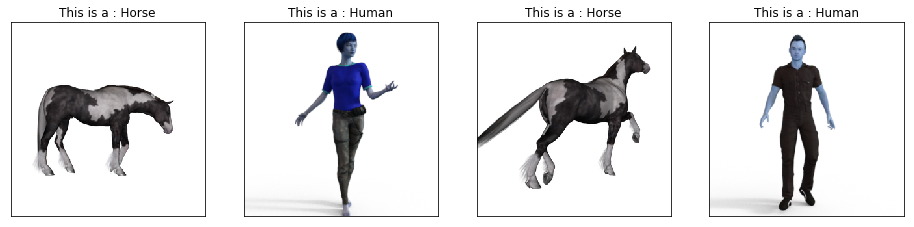

In [196]:
predict(validation_horse,validation_human)

In [186]:
guchipi = cv2.resize(cv2.imread("./img21.jpg"),(150,150)).reshape((1,150,150,3))

In [188]:
animal = ["Horse","Human"]
plt.imshow()
plt.xticks([])
plt.yticks([])
plt.title(model2.predict_classes(guchipi))

array([[1]])

In [14]:
train_datagen = ImageDataGenerator(rescale=(1.0 / 255),
                                   rotation_range = 40,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest"
                                   )

test_datagen = ImageDataGenerator(rescale=(1.0 / 255))


train_path = "./data/train/"
train_data = train_datagen.flow_from_directory(train_path,target_size=(150,150),class_mode="binary",batch_size=10)

test_path  = "./data/test/"
test_data  = test_datagen.flow_from_directory(test_path,target_size=(150,150),class_mode="binary",batch_size=10)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [15]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model3.compile(loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

In [16]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [17]:
history = model3.fit_generator(train_data,epochs=5,validation_data=test_data)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 80 steps, validate for 20 steps
Epoch 1/5
80/80 [==============================] - 80s 998ms/step - loss: 0.7451 - acc: 0.6550 - val_loss: 0.2701 - val_acc: 0.8750
Epoch 2/5
80/80 [==============================] - 52s 655ms/step - loss: 0.3822 - acc: 0.8500 - val_loss: 0.3426 - val_acc: 0.8500
Epoch 3/5
80/80 [==============================] - 46s 579ms/step - loss: 0.3048 - acc: 0.8775 - val_loss: 0.3599 - val_acc: 0.8150
Epoch 4/5
80/80 [==============================] - 47s 589ms/step - loss: 0.2694 - acc: 0.9112 - val_loss: 0.3589 - val_acc: 0.8050
Epoch 5/5
80/80 [==============================] - 47s 584ms/step - loss: 0.1600 - acc: 0.9362 - val_loss: 1.4930 - val_acc: 0.6450


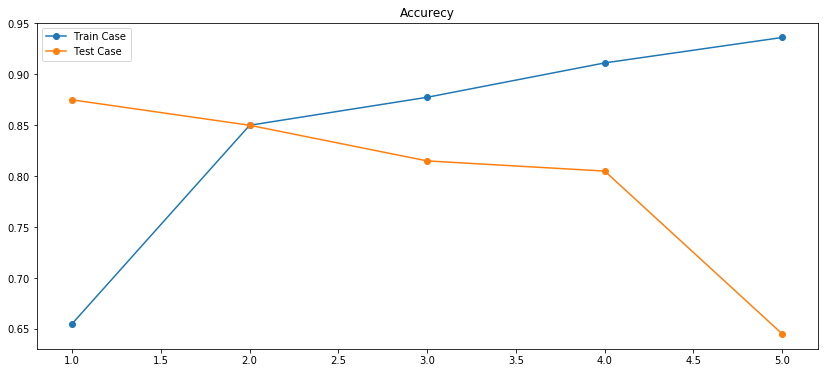

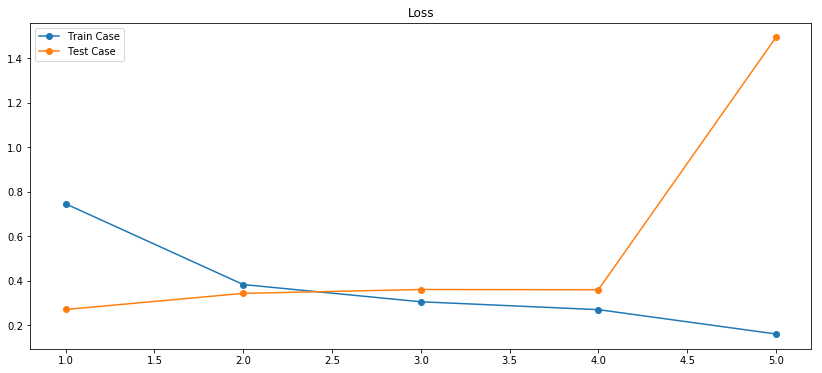

In [21]:
createGraph(history)

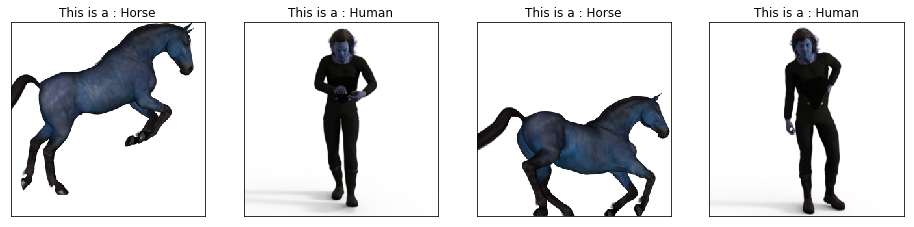

In [66]:
predict(validation_horse,validation_human,model2)